## Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [13]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

<h2> MLP + ReLU + ADAM </h2>

In [14]:
model_relu = Sequential()
model_relu.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(72, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 364)               285740    
_________________________________________________________________
dense_3 (Dense)              (None, 72)                26280     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                730       
Total params: 312,750
Trainable params: 312,750
Non-trainable params: 0
_________________________________________________________________
None


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.2509 - acc: 0.9257 - val_loss: 0.1234 - val_acc: 0.9620
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0985 - 

Test score: 0.09268554465530374
Test accuracy: 0.981


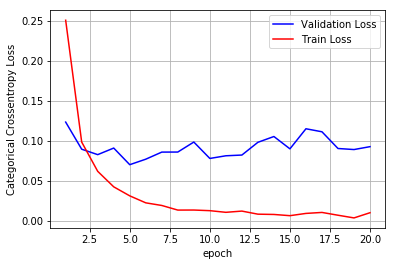

In [33]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
#print(x)

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
#print(ty)
plt_dynamic(x, vy, ty, ax)



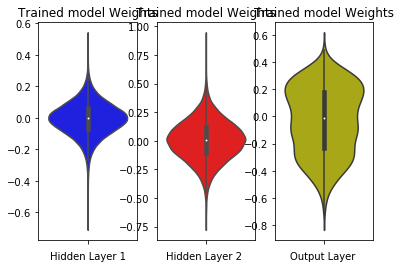

In [35]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [14]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(72, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 364)               285740    
_________________________________________________________________
batch_normalization_1 (Batch (None, 364)               1456      
_________________________________________________________________
dense_3 (Dense)              (None, 72)                26280     
_________________________________________________________________
batch_normalization_2 (Batch (None, 72)                288       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                730       
Total params: 314,494
Trainable params: 313,622
Non-trainable params: 872
_________________________________________________________________


In [15]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.2165 - acc: 0.9376 - val_loss: 0.1199 - val_acc: 0.9646
Epoch 2/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0828 - acc: 0.9759 - val_loss: 0.0924 - val_acc: 0.9718
Epoch 3/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0549 - acc: 0.9833 - val_loss: 0.0867 - val_acc: 0.9731
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0380 - acc: 0.9889 - val_loss: 0.0847 - val_acc: 0.9739
Epoch 5/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0293 - acc: 0.9910 - val_loss: 0.0862 - val_acc: 0.9750
Epoch 6/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0230 - acc: 0.9930 - val_loss: 0.0749 - val_acc: 0.9774
Epoch 7/20
60000/60000 [========

Test score: 0.09051545914988383
Test accuracy: 0.9767


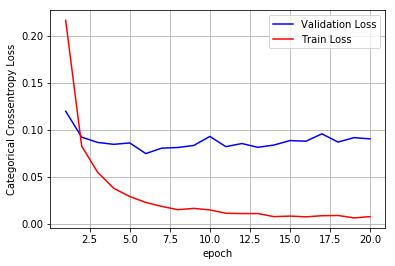

In [16]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

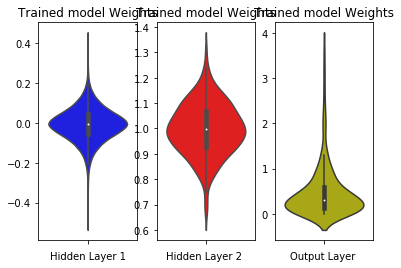

In [17]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [18]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(72, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 364)               285740    
_________________________________________________________________
batch_normalization_3 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_1 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 72)                26280     
_________________________________________________________________
batch_normalization_4 (Batch (None, 72)                288       
_________________________________________________________________
dropout_2 (Dropout)          (None, 72)                0         
_____

In [19]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.5634 - acc: 0.8287 - val_loss: 0.1879 - val_acc: 0.9407
Epoch 2/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.2963 - acc: 0.9125 - val_loss: 0.1416 - val_acc: 0.9558
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.2462 - acc: 0.9276 - val_loss: 0.1202 - val_acc: 0.9638
Epoch 4/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.2090 - acc: 0.9383 - val_loss: 0.1052 - val_acc: 0.9660
Epoch 5/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.1861 - acc: 0.9445 - val_loss: 0.1003 - val_acc: 0.9688
Epoch 6/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.1717 - acc: 0.9499 - val_loss: 0.0941 - val_acc: 0.9720
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.1558 - acc: 0.9544 - val_loss: 0.0899 - val_ac

Test score: 0.0624060621908051
Test accuracy: 0.9818


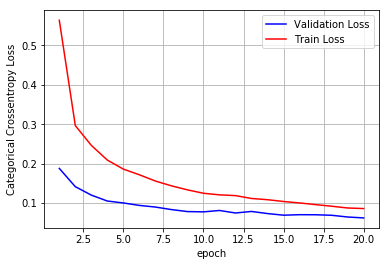

In [20]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

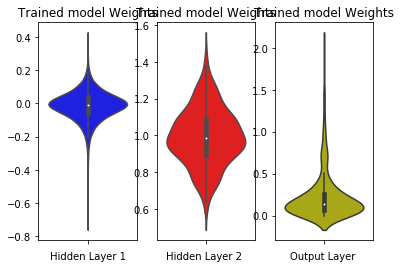

In [21]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# **3 Layer MLP+ReLU+Adam**

In [22]:
model_relu = Sequential()
model_relu.add(Dense(250, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(85, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_10 (Dense)             (None, 85)                8585      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                860       
Total params: 230,795
Trainable params: 230,795
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.2668 - acc: 0.9218 - val_loss: 0.1340 - val_acc: 0.9586
Epoch 2/20
60000/60000 [==============================

Test score: 0.087810692615682
Test accuracy: 0.9827


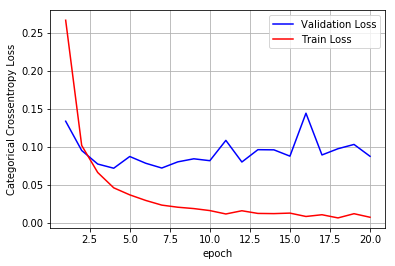

In [23]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
#print(x)

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
#print(ty)
plt_dynamic(x, vy, ty, ax)



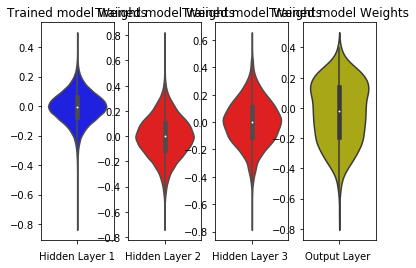

In [26]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# **3 Layer MLP+Batch Normalization+ReLU+Adam**

In [27]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(250, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(85, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 250)               196250    
_________________________________________________________________
batch_normalization_5 (Batch (None, 250)               1000      
_________________________________________________________________
dense_13 (Dense)             (None, 100)               25100     
_________________________________________________________________
batch_normalization_6 (Batch (None, 100)               400       
_________________________________________________________________
dense_14 (Dense)             (None, 85)                8585      
_________________________________________________________________
batch_normalization_7 (Batch (None, 85)                340       
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [28]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.2506 - acc: 0.9276 - val_loss: 0.1278 - val_acc: 0.9606
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0959 - acc: 0.9715 - val_loss: 0.1056 - val_acc: 0.9669
Epoch 3/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0645 - acc: 0.9806 - val_loss: 0.0965 - val_acc: 0.9693
Epoch 4/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0471 - acc: 0.9851 - val_loss: 0.0907 - val_acc: 0.9718
Epoch 5/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0364 - acc: 0.9891 - val_loss: 0.0841 - val_acc: 0.9746
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0302 - acc: 0.9905 - val_loss: 0.0857 - val_acc: 0.9755
Epoch 7/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0265 - acc: 0.9912 - val_loss: 0.0807 - val_

Test score: 0.08889246554333222
Test accuracy: 0.98


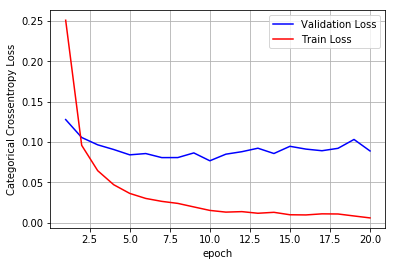

In [29]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

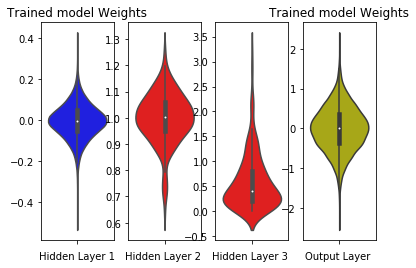

In [30]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# **3 Layer MLP+ReLU+Dropout+Adam**

In [31]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(250, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(85, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 250)               196250    
_________________________________________________________________
batch_normalization_8 (Batch (None, 250)               1000      
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               25100     
_________________________________________________________________
batch_normalization_9 (Batch (None, 100)               400       
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 85)               

In [32]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 128us/step - loss: 1.0290 - acc: 0.6731 - val_loss: 0.2667 - val_acc: 0.9234
Epoch 2/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.4735 - acc: 0.8611 - val_loss: 0.1968 - val_acc: 0.9387
Epoch 3/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.3619 - acc: 0.8965 - val_loss: 0.1666 - val_acc: 0.9508
Epoch 4/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.3176 - acc: 0.9091 - val_loss: 0.1467 - val_acc: 0.9554
Epoch 5/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.2827 - acc: 0.9201 - val_loss: 0.1331 - val_acc: 0.9597
Epoch 6/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.2512 - acc: 0.9293 - val_loss: 0.1291 - val_acc: 0.9605
Epoch 7/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.2323 - acc: 0.9352 - val_loss: 0.1202 - 

Test score: 0.08526910331975669
Test accuracy: 0.976


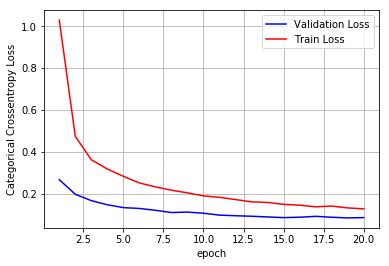

In [33]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

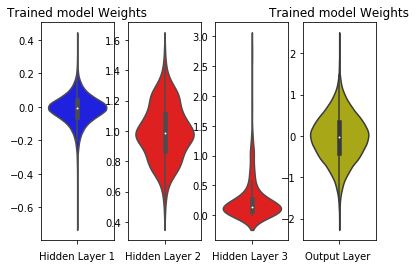

In [34]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# **5 Layer MLP+ReLU+Adam**

In [35]:
model_relu = Sequential()
model_relu.add(Dense(235, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(102, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(65, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(35, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 235)               184475    
_________________________________________________________________
dense_21 (Dense)             (None, 102)               24072     
_________________________________________________________________
dense_22 (Dense)             (None, 65)                6695      
_________________________________________________________________
dense_23 (Dense)             (None, 50)                3300      
_________________________________________________________________
dense_24 (Dense)             (None, 35)                1785      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                360       
Total params: 220,687
Trainable params: 220,687
Non-trainable params: 0
________________________________________________

Test score: 0.11873800104274924
Test accuracy: 0.9765


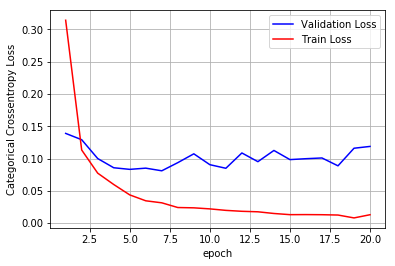

In [36]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

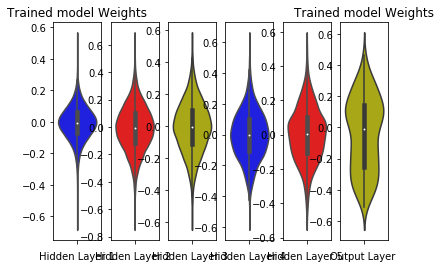

In [38]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='b')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# **5 Layer MLP+ Batch normalization_Relu_Adam**

In [39]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(235, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(102, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(65, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(35, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())


model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 235)               184475    
_________________________________________________________________
batch_normalization_11 (Batc (None, 235)               940       
_________________________________________________________________
dense_27 (Dense)             (None, 102)               24072     
_________________________________________________________________
batch_normalization_12 (Batc (None, 102)               408       
_________________________________________________________________
dense_28 (Dense)             (None, 65)                6695      
_________________________________________________________________
batch_normalization_13 (Batc (None, 65)                260       
_________________________________________________________________
dense_29 (Dense)             (None, 50)               

In [40]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.3773 - acc: 0.8937 - val_loss: 0.1553 - val_acc: 0.9558
Epoch 2/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.1254 - acc: 0.9630 - val_loss: 0.1210 - val_acc: 0.9621
Epoch 3/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.0879 - acc: 0.9733 - val_loss: 0.1143 - val_acc: 0.9656
Epoch 4/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.0680 - acc: 0.9791 - val_loss: 0.1035 - val_acc: 0.9705
Epoch 5/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0527 - acc: 0.9833 - val_loss: 0.1121 - val_acc: 0.9672
Epoch 6/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0434 - acc: 0.9863 - val_loss: 0.1037 - val_acc: 0.9702
Epoch 7/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.0364 - acc: 0.9882 - val_loss: 0.1156 -

Test score: 0.10316739412156312
Test accuracy: 0.9754


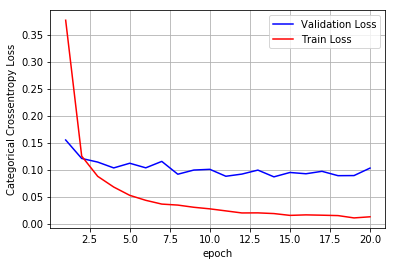

In [41]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

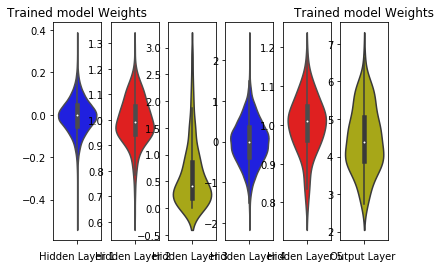

In [42]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='b')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# **5 MLP+Dropout+ReLU+Adam**

In [43]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(235, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(102, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(65, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(35, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))


model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 235)               184475    
_________________________________________________________________
batch_normalization_16 (Batc (None, 235)               940       
_________________________________________________________________
dropout_6 (Dropout)          (None, 235)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 102)               24072     
_________________________________________________________________
batch_normalization_17 (Batc (None, 102)               408       
_________________________________________________________________
dropout_7 (Dropout)          (None, 102)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 65)               

In [44]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 199us/step - loss: 2.1567 - acc: 0.2681 - val_loss: 0.9967 - val_acc: 0.7442
Epoch 2/20
60000/60000 [==============================] - 9s 152us/step - loss: 1.3065 - acc: 0.5476 - val_loss: 0.5086 - val_acc: 0.8687
Epoch 3/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.9505 - acc: 0.6814 - val_loss: 0.3757 - val_acc: 0.8998
Epoch 4/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.7723 - acc: 0.7492 - val_loss: 0.3148 - val_acc: 0.9044
Epoch 5/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.6576 - acc: 0.7985 - val_loss: 0.2575 - val_acc: 0.9332
Epoch 6/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.5789 - acc: 0.8294 - val_loss: 0.2122 - val_acc: 0.9481
Epoch 7/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.5112 - acc: 0.8555 - val_loss: 0.1928 -

Test score: 0.13083188042640687
Test accuracy: 0.9706


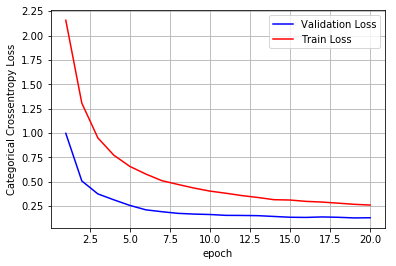

In [45]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

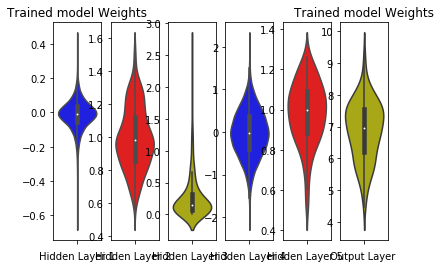

In [46]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='b')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [49]:
from prettytable import PrettyTable
x = PrettyTable(["Feature", "Accuracy(%)", "Loss(%)"])
x.add_row(["ReLU+Adam", 98.1, 9.2])
x.add_row(["ReLU+Batch+Adam",97.6,9.05])
x.add_row(["ReLU+Dropout+Adam",98.18,6.24])
print("2 Layer MLP Results")
print(x)


y = PrettyTable(["Feature", "Accuracy(%)", "Loss(%)"])
y.add_row(["ReLU+Adam",98.27, 8.78])
y.add_row(["ReLU+Batch+Adam",98,8.88])
y.add_row(["ReLU+Dropout+Adam",97.6,8.52])
print("3 Layer MLP Results")
print(y)

    

z = PrettyTable(["Feature", "Accuracy(%)", "Loss(%)"])
z.add_row(["ReLU+Adam", 97.65, 11.87])
z.add_row(["ReLU+Batch+Adam",97.54,10.31])
z.add_row(["ReLU+Dropout+Adam",97.06,13.08])
print("5 Layer MLP Results")
print(z)

    

    

2 Layer MLP Results
+-------------------+-------------+---------+
|      Feature      | Accuracy(%) | Loss(%) |
+-------------------+-------------+---------+
|     ReLU+Adam     |     98.1    |   9.2   |
|  ReLU+Batch+Adam  |     97.6    |   9.05  |
| ReLU+Dropout+Adam |    98.18    |   6.24  |
+-------------------+-------------+---------+
3 Layer MLP Results
+-------------------+-------------+---------+
|      Feature      | Accuracy(%) | Loss(%) |
+-------------------+-------------+---------+
|     ReLU+Adam     |    98.27    |   8.78  |
|  ReLU+Batch+Adam  |      98     |   8.88  |
| ReLU+Dropout+Adam |     97.6    |   8.52  |
+-------------------+-------------+---------+
5 Layer MLP Results
+-------------------+-------------+---------+
|      Feature      | Accuracy(%) | Loss(%) |
+-------------------+-------------+---------+
|     ReLU+Adam     |    97.65    |  11.87  |
|  ReLU+Batch+Adam  |    97.54    |  10.31  |
| ReLU+Dropout+Adam |    97.06    |  13.08  |
+-------------------

Observation:
1. For 2 hidden layers, the number of nodes taken in each layer are 364 and 72.
2. For 3 hidden layers, the number of nodes taken in each layer are 250,100,85.
3. For 5 hidden layers, the number of nodes taken in each layer are 235,102,65,50,35.
4. ReLU activation function with Adam optimizer is implemented with Batch normalization and dropout.
5. Upon seeing the results, for 3 MLP the Multi-class log loss is lesser(8.52) compared to 5 MLP(>10).
6. With respect to accuracy, again 3 MLP produces better results(98.27).